In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
df_spectral = pd.read_csv(r"F:\wenqu\Aviris\combine\aviris_output.csv")
df_spectral

,file_name,band_16,band_17,band_18,band_19,band_20,band_21,band_22,band_23,band_24,...,band_395,band_396,band_397,band_398,band_399,band_400,band_401,band_402,band_403,band_404
0,site1b_10_21.tif,0.030402,0.028525,0.030111,0.032009,0.031008,0.031431,0.032624,0.031763,0.032500,...,0.053857,0.054110,0.051653,0.050437,0.053759,0.049272,0.048609,0.051505,0.049786,0.044607
1,site1b_10_24.tif,0.030805,0.029308,0.031319,0.032004,0.031469,0.031263,0.032163,0.031412,0.031647,...,0.048453,0.049427,0.049070,0.050183,0.050089,0.047785,0.044082,0.047564,0.047602,0.042990
2,site1b_10_25.tif,0.029818,0.029943,0.031615,0.032896,0.032790,0.032231,0.032862,0.032542,0.032359,...,0.054360,0.055096,0.055735,0.054570,0.053953,0.053713,0.050551,0.053728,0.048996,0.047515
3,site1b_10_26.tif,0.028953,0.028596,0.029417,0.030974,0.030096,0.030064,0.030843,0.030819,0.031217,...,0.053602,0.054162,0.053460,0.051959,0.052348,0.049764,0.049783,0.049485,0.049124,0.045897
4,site1b_10_27.tif,0.030194,0.029072,0.031152,0.031962,0.033075,0.031606,0.032960,0.031858,0.031784,...,0.050521,0.052109,0.048870,0.050354,0.049694,0.047207,0.044002,0.047390,0.046256,0.044414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,site6_9_46.tif,0.041151,0.043303,0.045553,0.043965,0.044650,0.045819,0.047326,0.048459,0.048458,...,0.083137,0.081265,0.081099,0.083178,0.080489,0.081618,0.079605,0.079868,0.076788,0.078303
3572,site6_9_47.tif,0.037633,0.038123,0.040890,0.040855,0.042653,0.043819,0.044825,0.046315,0.045017,...,0.083531,0.079225,0.082199,0.080039,0.083467,0.079242,0.082244,0.079118,0.078652,0.075917
3573,site6_9_48.tif,0.037282,0.037747,0.040314,0.040320,0.042858,0.043147,0.044671,0.044944,0.044449,...,0.075531,0.075147,0.073898,0.074897,0.074406,0.072694,0.076727,0.075635,0.071296,0.071726
3574,site6_9_49.tif,0.035442,0.035597,0.037806,0.039369,0.039687,0.040756,0.041030,0.042670,0.042498,...,0.063318,0.066033,0.064493,0.061225,0.065052,0.062663,0.063612,0.060363,0.058004,0.060773


In [3]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [4]:
len(band_name)

319

In [5]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [6]:
x.shape

(3576, 319)

In [7]:
# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*sigma**2))

In [8]:
la_trait_pdf = []
for file_name in df_spectral['file_name']:
    print(file_name)
    file_name = 'F:/wenqu/Aviris/combine/trait_map/'  + file_name
    x_data = gdal.Open(file_name).ReadAsArray()
    x_data = x_data[x_data>0.05].flatten()
    
    hist, bin_edges = np.histogram(x_data)
    hist=hist/sum(hist)
    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    # middle value for each bin, has the same shape as y_hist
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    # number of values falling into each bins - probability     
    y_hist=hist
    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist)
#     p0=[max(y_hist)]

#     p0=[max(y_hist),mean,sigma]



    la_trait_pdf.append(sigma)


site1b_10_21.tif
site1b_10_24.tif
site1b_10_25.tif
site1b_10_26.tif
site1b_10_27.tif
site1b_10_28.tif
site1b_10_29.tif
site1b_10_30.tif
site1b_10_31.tif
site1b_10_34.tif
site1b_10_35.tif
site1b_10_36.tif
site1b_10_37.tif
site1b_11_21.tif
site1b_11_26.tif
site1b_11_27.tif
site1b_11_28.tif
site1b_11_29.tif
site1b_11_30.tif
site1b_11_31.tif
site1b_11_32.tif
site1b_11_34.tif
site1b_11_35.tif
site1b_11_36.tif
site1b_11_37.tif
site1b_11_38.tif
site1b_11_39.tif
site1b_12_21.tif
site1b_12_22.tif
site1b_12_23.tif
site1b_12_28.tif
site1b_12_29.tif
site1b_12_30.tif
site1b_12_31.tif
site1b_12_32.tif
site1b_12_33.tif
site1b_12_34.tif
site1b_12_35.tif
site1b_12_36.tif
site1b_12_37.tif
site1b_12_38.tif
site1b_12_39.tif
site1b_12_40.tif
site1b_12_51.tif
site1b_13_20.tif
site1b_13_21.tif
site1b_13_22.tif
site1b_13_23.tif
site1b_13_24.tif
site1b_13_25.tif
site1b_13_26.tif
site1b_13_30.tif
site1b_13_32.tif
site1b_13_33.tif
site1b_13_34.tif
site1b_13_35.tif
site1b_13_36.tif
site1b_13_37.tif
site1b_13_38.t

site1b_26_67.tif
site1b_26_74.tif
site1b_26_75.tif
site1b_26_76.tif
site1b_26_77.tif
site1b_26_78.tif
site1b_26_79.tif
site1b_27_17.tif
site1b_27_18.tif
site1b_27_19.tif
site1b_27_20.tif
site1b_27_21.tif
site1b_27_24.tif
site1b_27_25.tif
site1b_27_26.tif
site1b_27_27.tif
site1b_27_28.tif
site1b_27_29.tif
site1b_27_30.tif
site1b_27_32.tif
site1b_27_33.tif
site1b_27_34.tif
site1b_27_35.tif
site1b_27_36.tif
site1b_27_37.tif
site1b_27_40.tif
site1b_27_41.tif
site1b_27_42.tif
site1b_27_43.tif
site1b_27_44.tif
site1b_27_45.tif
site1b_27_46.tif
site1b_27_47.tif
site1b_27_48.tif
site1b_27_49.tif
site1b_27_50.tif
site1b_27_51.tif
site1b_27_52.tif
site1b_27_58.tif
site1b_27_59.tif
site1b_27_60.tif
site1b_27_61.tif
site1b_27_62.tif
site1b_27_63.tif
site1b_27_64.tif
site1b_27_65.tif
site1b_27_66.tif
site1b_27_67.tif
site1b_27_75.tif
site1b_27_76.tif
site1b_27_77.tif
site1b_27_78.tif
site1b_27_79.tif
site1b_27_80.tif
site1b_28_16.tif
site1b_28_17.tif
site1b_28_18.tif
site1b_28_19.tif
site1b_28_20.t

site1b_37_67.tif
site1b_37_68.tif
site1b_37_69.tif
site1b_37_70.tif
site1b_37_71.tif
site1b_37_72.tif
site1b_37_73.tif
site1b_37_75.tif
site1b_37_76.tif
site1b_37_77.tif
site1b_37_78.tif
site1b_37_79.tif
site1b_37_80.tif
site1b_37_81.tif
site1b_37_82.tif
site1b_37_83.tif
site1b_37_84.tif
site1b_37_85.tif
site1b_37_88.tif
site1b_37_89.tif
site1b_37_90.tif
site1b_37_91.tif
site1b_37_92.tif
site1b_37_93.tif
site1b_37_94.tif
site1b_37_95.tif
site1b_37_96.tif
site1b_37_97.tif
site1b_38_12.tif
site1b_38_13.tif
site1b_38_14.tif
site1b_38_15.tif
site1b_38_16.tif
site1b_38_17.tif
site1b_38_18.tif
site1b_38_19.tif
site1b_38_20.tif
site1b_38_21.tif
site1b_38_22.tif
site1b_38_23.tif
site1b_38_24.tif
site1b_38_25.tif
site1b_38_29.tif
site1b_38_30.tif
site1b_38_31.tif
site1b_38_32.tif
site1b_38_33.tif
site1b_38_34.tif
site1b_38_35.tif
site1b_38_36.tif
site1b_38_37.tif
site1b_38_38.tif
site1b_38_39.tif
site1b_38_40.tif
site1b_38_41.tif
site1b_38_46.tif
site1b_38_47.tif
site1b_38_48.tif
site1b_38_49.t

site1b_47_92.tif
site1b_47_93.tif
site1b_47_94.tif
site1b_47_95.tif
site1b_47_96.tif
site1b_47_97.tif
site1b_48_102.tif
site1b_48_103.tif
site1b_48_104.tif
site1b_48_105.tif
site1b_48_106.tif
site1b_48_32.tif
site1b_48_33.tif
site1b_48_34.tif
site1b_48_35.tif
site1b_48_36.tif
site1b_48_37.tif
site1b_48_38.tif
site1b_48_39.tif
site1b_48_40.tif
site1b_48_41.tif
site1b_48_42.tif
site1b_48_43.tif
site1b_48_44.tif
site1b_48_49.tif
site1b_48_50.tif
site1b_48_51.tif
site1b_48_52.tif
site1b_48_53.tif
site1b_48_54.tif
site1b_48_55.tif
site1b_48_66.tif
site1b_48_67.tif
site1b_48_68.tif
site1b_48_69.tif
site1b_48_70.tif
site1b_48_71.tif
site1b_48_72.tif
site1b_48_73.tif
site1b_48_74.tif
site1b_48_75.tif
site1b_48_77.tif
site1b_48_78.tif
site1b_48_79.tif
site1b_48_80.tif
site1b_48_81.tif
site1b_48_82.tif
site1b_48_83.tif
site1b_48_84.tif
site1b_48_85.tif
site1b_48_86.tif
site1b_48_90.tif
site1b_48_91.tif
site1b_48_92.tif
site1b_48_93.tif
site1b_48_94.tif
site1b_48_95.tif
site1b_48_96.tif
site1b_48

site1b_60_94.tif
site1b_60_95.tif
site1b_60_96.tif
site1b_60_97.tif
site1b_60_98.tif
site1b_60_99.tif
site1b_61_100.tif
site1b_61_101.tif
site1b_61_70.tif
site1b_61_71.tif
site1b_61_72.tif
site1b_61_73.tif
site1b_61_74.tif
site1b_61_75.tif
site1b_61_76.tif
site1b_61_77.tif
site1b_61_78.tif
site1b_61_79.tif
site1b_61_82.tif
site1b_61_83.tif
site1b_61_84.tif
site1b_61_85.tif
site1b_61_86.tif
site1b_61_87.tif
site1b_61_88.tif
site1b_61_89.tif
site1b_61_90.tif
site1b_61_95.tif
site1b_61_96.tif
site1b_61_97.tif
site1b_61_98.tif
site1b_61_99.tif
site1b_62_100.tif
site1b_62_101.tif
site1b_62_102.tif
site1b_62_103.tif
site1b_62_71.tif
site1b_62_72.tif
site1b_62_73.tif
site1b_62_74.tif
site1b_62_75.tif
site1b_62_76.tif
site1b_62_77.tif
site1b_62_78.tif
site1b_62_79.tif
site1b_62_80.tif
site1b_62_83.tif
site1b_62_84.tif
site1b_62_85.tif
site1b_62_86.tif
site1b_62_87.tif
site1b_62_88.tif
site1b_62_89.tif
site1b_62_90.tif
site1b_62_91.tif
site1b_62_96.tif
site1b_62_97.tif
site1b_62_98.tif
site1b_6

site2a_17_19.tif
site2a_17_20.tif
site2a_17_21.tif
site2a_17_22.tif
site2a_17_23.tif
site2a_17_24.tif
site2a_17_25.tif
site2a_17_26.tif
site2a_17_27.tif
site2a_17_28.tif
site2a_17_29.tif
site2a_17_30.tif
site2a_17_31.tif
site2a_17_32.tif
site2a_17_8.tif
site2a_17_9.tif
site2a_18_10.tif
site2a_18_11.tif
site2a_18_12.tif
site2a_18_13.tif
site2a_18_14.tif
site2a_18_15.tif
site2a_18_16.tif
site2a_18_17.tif
site2a_18_18.tif
site2a_18_19.tif
site2a_18_20.tif
site2a_18_21.tif
site2a_18_22.tif
site2a_18_23.tif
site2a_18_24.tif
site2a_18_25.tif
site2a_18_26.tif
site2a_18_27.tif
site2a_18_28.tif
site2a_18_30.tif
site2a_18_31.tif
site2a_18_32.tif
site2a_18_9.tif
site2a_19_10.tif
site2a_19_11.tif
site2a_19_12.tif
site2a_19_13.tif
site2a_19_14.tif
site2a_19_15.tif
site2a_19_16.tif
site2a_19_17.tif
site2a_19_18.tif
site2a_19_19.tif
site2a_19_20.tif
site2a_19_21.tif
site2a_19_22.tif
site2a_19_23.tif
site2a_19_24.tif
site2a_19_25.tif
site2a_19_26.tif
site2a_19_27.tif
site2a_19_28.tif
site2a_19_30.tif


site6_51_15.tif
site6_51_16.tif
site6_51_17.tif
site6_51_9.tif
site6_52_10.tif
site6_52_11.tif
site6_52_12.tif
site6_52_13.tif
site6_52_14.tif
site6_52_15.tif
site6_52_16.tif
site6_52_8.tif
site6_52_9.tif
site6_53_10.tif
site6_53_11.tif
site6_53_12.tif
site6_53_13.tif
site6_53_14.tif
site6_53_15.tif
site6_53_7.tif
site6_53_8.tif
site6_53_9.tif
site6_54_10.tif
site6_54_11.tif
site6_54_12.tif
site6_54_13.tif
site6_54_14.tif
site6_54_7.tif
site6_54_8.tif
site6_54_9.tif
site6_55_10.tif
site6_55_11.tif
site6_55_12.tif
site6_55_13.tif
site6_55_7.tif
site6_55_8.tif
site6_55_9.tif
site6_56_10.tif
site6_56_11.tif
site6_56_12.tif
site6_56_8.tif
site6_56_9.tif
site6_57_10.tif
site6_57_11.tif
site6_57_9.tif
site6_58_10.tif
site6_5_50.tif
site6_5_51.tif
site6_5_52.tif
site6_5_53.tif
site6_6_49.tif
site6_6_50.tif
site6_6_51.tif
site6_6_52.tif
site6_7_48.tif
site6_7_49.tif
site6_7_50.tif
site6_7_51.tif
site6_8_47.tif
site6_8_48.tif
site6_8_49.tif
site6_8_50.tif
site6_8_51.tif
site6_9_46.tif
site6_9_4

In [9]:
la_trait_pdf

[0.005574193192896061,
 0.0017854987045371625,
 0.00209272015259889,
 0.0026443492373815327,
 0.0024606568404282794,
 0.005468334442962064,
 0.006063046695287186,
 0.0036957704790335,
 0.0023806131663442706,
 0.002448719937966194,
 0.002004613846935371,
 0.0021197522277151518,
 0.002083105407679648,
 0.004162510950655857,
 0.0034574399780183934,
 0.003955619895332662,
 0.005992134833942689,
 0.0040760075225986575,
 0.003127291406465796,
 0.0017540174855904338,
 0.002179944583290115,
 0.001151437520164068,
 0.0012585262660918524,
 0.0018557442813372162,
 0.003385491400504416,
 0.0023692342794338233,
 0.0027679786854695157,
 0.0029818577759434944,
 0.0019873404618233194,
 0.002458483420226521,
 0.004747604188925649,
 0.001541884080801086,
 0.002986597311307731,
 0.002886360918382236,
 0.002192227845355416,
 0.0017778095393033708,
 0.0012393758349225886,
 0.001016176218313633,
 0.0008695582431260738,
 0.001567565125832092,
 0.002421603954857994,
 0.0018455425228153005,
 0.0026465683449350

In [10]:
y = la_trait_pdf
y = np.array(y)


In [11]:
y.shape

(3576,)

In [12]:
print(y.dtype)

float64


In [13]:
y.shape, x.shape

((3576,), (3576, 319))

In [14]:
band_name = np.array(band_name)

In [15]:
# Python
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [16]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  276
Optimised MSEP  9.571083942224824e-07



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.265
R2 CV: 0.202
MSE calib: 0.000
MSE CV: 0.000


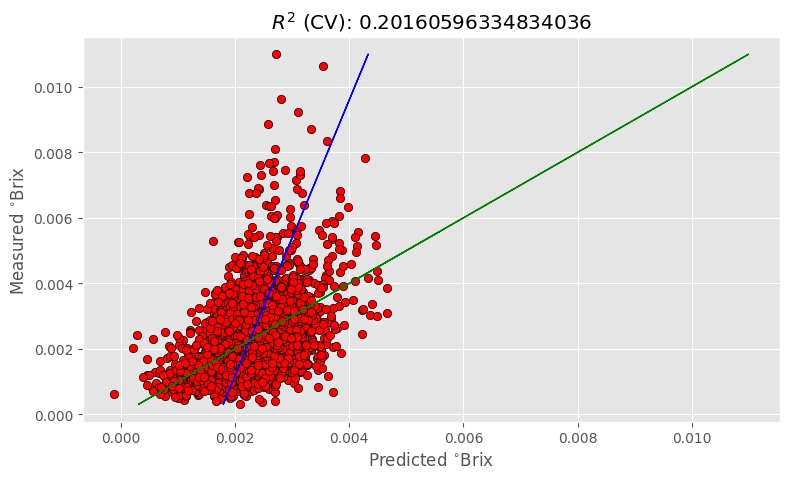

In [17]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x, y, 30)
simple_pls_cv(opt_Xc, y, ncomp)